<a href="https://colab.research.google.com/github/yeyevtushenko/IntroductionIAD/blob/main/%D0%92%D1%81%D1%82%D1%83%D0%BF_%D0%B4%D0%BE_%D1%96%D0%BD%D1%82%D0%B5%D0%BB%D0%B5%D0%BA%D1%82%D1%83%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B3%D0%BE_%D0%B0%D0%BD%D0%B0%D0%BB%D1%96%D0%B7%D1%83_%D0%B4%D0%B0%D0%BD%D0%B8%D1%85_%D0%91%D0%A1_25_%D0%84%D0%B2%D1%82%D1%83%D1%88%D0%B5%D0%BD%D0%BA%D0%BE_%D0%84%D0%B3%D0%BE%D1%80_%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%BD%D0%B0_%D1%80%D0%BE%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%964.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Практична №4

##Теоретична частина

### Що таке ієрархічна кластиризація?

Ієрархічна кластеризація — це метод групування об'єктів на основі їхньої схожості, що дозволяє побудувати ієрархію вкладених кластерів.

Основні підходи:

1. Агломеративний (знизу-вгору): Кожен об'єкт розглядається як окремий кластер. Потім найближчі кластери послідовно об'єднуються, доки всі об'єкти не утворять один великий кластер.
2. Дивізивний (згори-вниз): Усі об'єкти спочатку об'єднані в один кластер, який поступово розділяється на менші кластери, доки кожен об'єкт не стане окремим кластером.

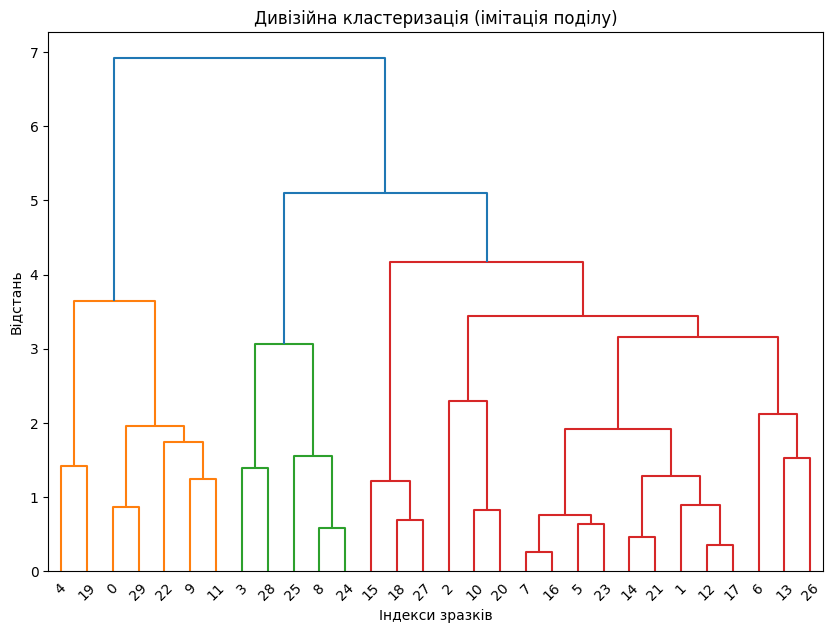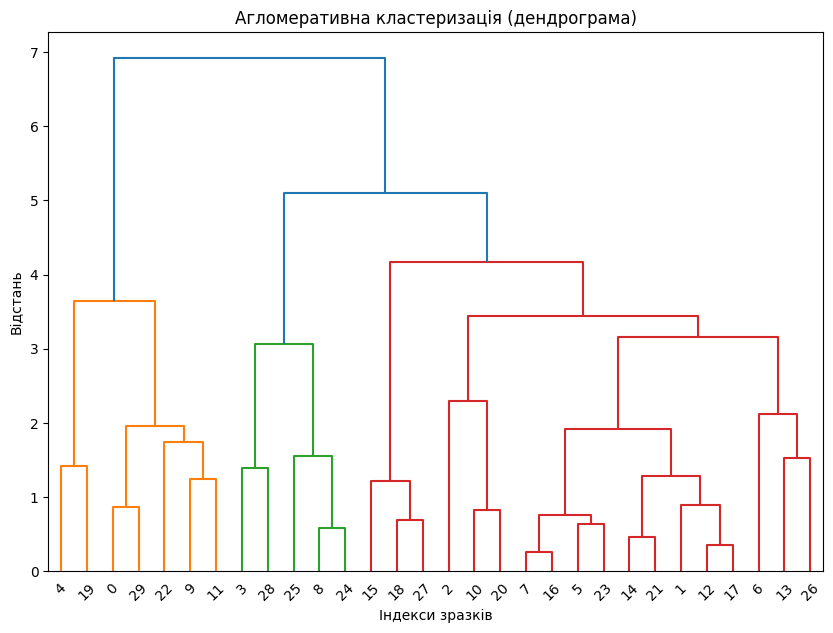

Процес агломеративної кластеризації:

1. Ініціалізація: Кожен об'єкт є окремим кластером.
2. Обчислення відстаней: Визначаються відстані між усіма парами кластерів за обраною метрикою (наприклад, евклідова відстань).
3. Об'єднання кластерів: Два найближчі кластери об'єднуються в один.
4. Оновлення відстаней: Перераховуються відстані між новим кластером та іншими кластерами.
5. Повторення: Кроки 3 і 4 повторюються, доки всі об'єкти не об'єднаються в один кластер.

Візуалізація результатів:

Результати ієрархічної кластеризації часто представляють у вигляді дендрограми — деревоподібної діаграми, що відображає послідовність об'єднання або розділення кластерів. Дендрограма допомагає визначити оптимальну кількість кластерів, аналізуючи рівні, на яких відбуваються значні зміни відстаней між кластерами.

### Графічна візуалізація

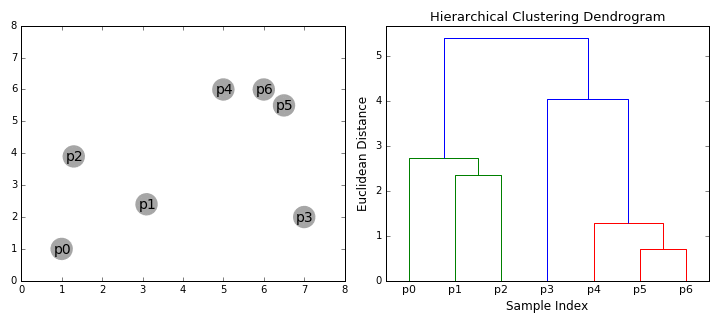

### Графічна візуалізація з визначенням відстані

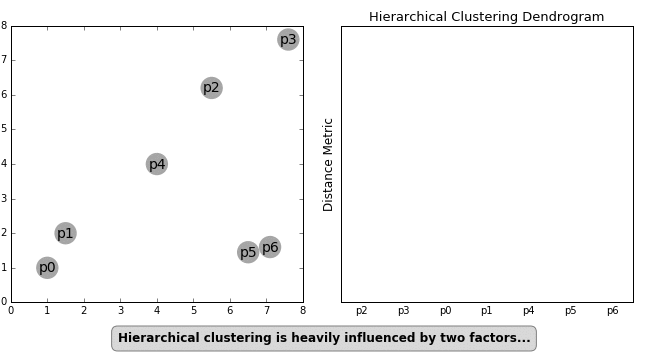

### Переваги/недоліки

Переваги:

- Не потребує попереднього визначення кількості кластерів.
- Дозволяє виявити вкладену структуру даних.

Недоліки:

- Висока обчислювальна складність для великих наборів даних.
- Чутливість до шуму та викидів у даних.

### Вибір кількості кластерів


Визначення оптимальної кількості кластерів часто виконується за допомогою методу "ліктя". В цьому методі ми обчислюємо внутрішньокластерну відстань для різної кількості кластерів і будуємо графік цієї залежності. Точка на графіку, де відбувається "перелом" (утворюється "лікоть"), вказує на оптимальну кількість кластерів.

## Практична частина

### Імпорт модулів

In [27]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from openpyxl import Workbook

### Функція для вибору метрики

In [5]:
def select_metric():
    print("Виберіть метрику для обчислення відстаней:")
    print("1. Квадрат відстані Евкліда")
    print("2. Відстань Евкліда")
    print("3. Відстань Чебишева")
    print("4. Відстань Міньковського (p=3)")
    choice = int(input("Введіть номер метрики (1-4): "))

    if choice == 1:
        return 'sqeuclidean'  # Квадрат Евклідової відстані
    elif choice == 2:
        return 'euclidean'  # Евклідова відстань
    elif choice == 3:
        return 'chebyshev'  # Відстань Чебишева
    elif choice == 4:
        return 'minkowski'  # Відстань Міньковського
    else:
        print("Неправильний вибір. Використовується відстань Евкліда за замовчуванням.")
        return 'euclidean'

###Завантаження даних

In [6]:
data = pd.read_csv("https://raw.githubusercontent.com/yeyevtushenko/IntroductionIAD/refs/heads/Data/prostate.csv")

In [7]:
data.head()

,patno,stage,rx,dtime,status,age,wt,pf,hx,sbp,dbp,ekg,hg,sz,sg,ap,bm,sdate
0,1,3,0.2 mg estrogen,72,alive,75.0,76.0,normal activity,0,15,9,heart strain,13.798828,2.0,8.0,0.299988,0,2778
1,2,3,0.2 mg estrogen,1,dead - other ca,54.0,116.0,normal activity,0,13,7,heart block or conduction def,14.599609,42.0,NaN,0.699951,0,2820
2,3,3,5.0 mg estrogen,40,dead - cerebrovascular,69.0,102.0,normal activity,1,14,8,heart strain,13.398438,3.0,9.0,0.299988,0,2933
3,4,3,0.2 mg estrogen,20,dead - cerebrovascular,75.0,94.0,in bed < 50% daytime,1,14,7,benign,17.597656,4.0,8.0,0.899902,0,2999
4,5,3,placebo,65,alive,67.0,99.0,normal activity,0,17,10,normal,13.398438,34.0,8.0,0.500000,0,3002


### Вибір варіанту для виконання роботу

In [8]:
N = int(input("Enter your variant: "))
P = int(input("Enter your num of group: "))

start_index = N * 10 + P + 1
end_index = N * 10 + P + 30

# Вибір необхідної підмножини даних
subset_data = data.iloc[start_index:end_index][['ekg', 'age', 'bm']].dropna()

Enter your variant: 8
Enter your num of group: 25


### Перетворення текстових значень у стовпці 'Ekg' на числові

In [9]:
label_encoder = LabelEncoder()
subset_data['ekg'] = label_encoder.fit_transform(subset_data['ekg'])

### Нормалізація даних

In [10]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(subset_data)

### Вибір метрики

In [13]:
metric = select_metric()
if metric == 'minkowski':
    p = 3  # Параметр для метрики Міньковського
    distance_matrix = pdist(scaled_data, metric=metric, p=p)
else:
    distance_matrix = pdist(scaled_data, metric=metric)

Виберіть метрику для обчислення відстаней:
1. Квадрат відстані Евкліда
2. Відстань Евкліда
3. Відстань Чебишева
4. Відстань Міньковського (p=3)
Введіть номер метрики (1-4): 1


### Функція для вибору методу кластеризації

In [14]:
def select_method():
    print("Виберіть метод кластеризації:")
    print("1. Метод Уорда (ward)")
    print("2. Метод найближчого сусіда (single linkage)")
    choice = int(input("Введіть номер методу (1-2): "))

    if choice == 1:
        return 'ward'
    elif choice == 2:
        return 'single'
    else:
        print("Неправильний вибір. Використовується метод Уорда за замовчуванням.")
        return 'ward'

### Функція для рекомендації методу

In [15]:
def recommend_method(data):
    """
    Аналізує дані та рекомендує метод кластеризації:
    - Ward для компактних і щільних даних.
    - Single linkage для витягнутих або нерівномірних кластерів.
    """
    # Обчислення дисперсії для аналізу щільності даних
    variance = np.var(data, axis=0).mean()

    if variance < 1.0:
        print("Рекомендація: Використовуйте метод Уорда для більш компактних кластерів.")
        return 'ward'
    else:
        print("Рекомендація: Використовуйте метод найближчого сусіда для витягнутих кластерів.")
        return 'single'

### Рекомендація та вибір методу кластеризації


In [17]:
method = recommend_method(scaled_data) # - рекомендація методу програмної реалізації
# method = select_method() # - відповідає за самостійний вибір користувачем методу

Рекомендація: Використовуйте метод найближчого сусіда для витягнутих кластерів.


для перевірки потрібно розкометнтувати один рядок та закоментувати інший

### Реалізація ієрархічної кластеризації

In [19]:
def hierarchical_clustering(scaled_data, metric, method='method'):
    """
    Виконує ієрархічну кластеризацію з вибором метрики відстані.
    Повертає дендрограму та матрицю класифікації.
    """
    # Обчислення зв'язок з вибраною метрикою
    Z = linkage(scaled_data, method=method, metric=metric)

    return Z

### Виконання кластеризації

In [22]:
Z = hierarchical_clustering(scaled_data, metric, method)

### Побудова дендрограми


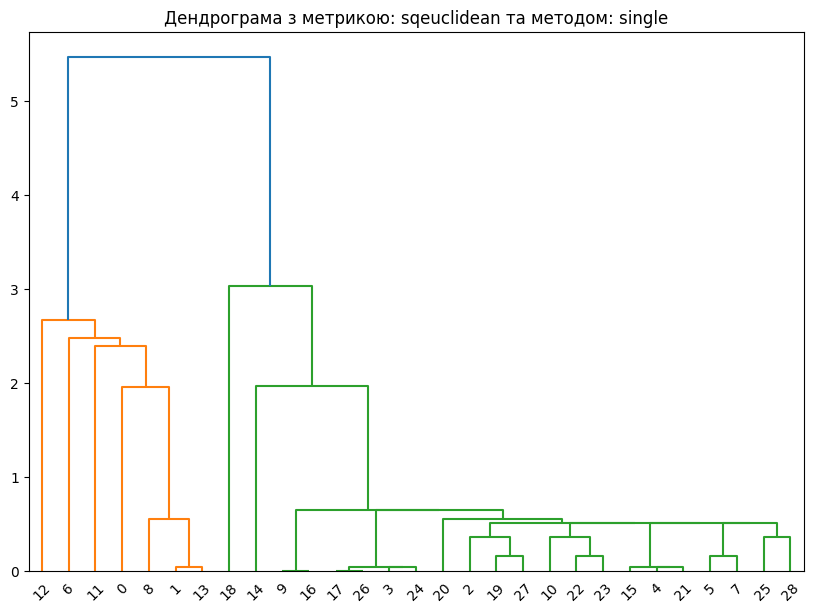

In [23]:
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title(f'Дендрограма з метрикою: {metric} та методом: {method}')
plt.show()

### Отримання кластерів для 1-30 кластерів

In [29]:
clusters_30 = fcluster(Z, t=30, criterion='maxclust')
classification_matrix = pd.DataFrame({'Index': subset_data.index, 'Cluster': clusters_30})
print("Матриця класифікації для 30 кластерів:")
classification_matrix

Матриця класифікації для 30 кластерів:


,Index,Cluster
0,106,4
1,107,1
2,108,14
3,109,10
4,110,18
5,111,21
6,112,6
7,113,22
8,114,3
9,115,8


##Внутрішньокластерна відстань для 2-10 кластерів

In [34]:
def calculate_within_cluster_distance_for_k(data, Z, k):
    """
    Обчислює внутрішньокластерну відстань для заданої кількості кластерів k.
    """
    clusters = fcluster(Z, t=k, criterion='maxclust')
    distance = 0
    for cluster_id in np.unique(clusters):
        cluster_points = data[clusters == cluster_id]
        centroid = cluster_points.mean(axis=0)
        distance += np.sum(np.linalg.norm(cluster_points - centroid, axis=1))
    print(f"Внутрішньокластерна відстань для {k} кластерів: {distance}")
    return distance

##Матриця відстаней для 1-30 кластерів

In [35]:
distance_matrix = []
for i in range(1, 31):
    distance = calculate_within_cluster_distance_for_k(scaled_data, Z, k=i)
    distance_matrix.append([i, distance])

# Створення DataFrame для відображення результатів
distance_df = pd.DataFrame(distance_matrix, columns=['Clusters', 'Within-cluster Distance'])
print("Матриця відстаней для 1-30 кластерів:")
distance_df

Внутрішньокластерна відстань для 1 кластерів: 46.80319026158765
Внутрішньокластерна відстань для 2 кластерів: 36.810650870888175
Внутрішньокластерна відстань для 3 кластерів: 34.213269028742005
Внутрішньокластерна відстань для 4 кластерів: 32.30726048195682
Внутрішньокластерна відстань для 5 кластерів: 29.580889613912856
Внутрішньокластерна відстань для 6 кластерів: 27.92810570329677
Внутрішньокластерна відстань для 7 кластерів: 25.453799887241527
Внутрішньокластерна відстань для 8 кластерів: 23.864153326611127
Внутрішньокластерна відстань для 9 кластерів: 21.798158537829188
Внутрішньокластерна відстань для 10 кластерів: 17.756202855144785
Внутрішньокластерна відстань для 11 кластерів: 15.642979419466526
Внутрішньокластерна відстань для 12 кластерів: 14.779938222372278
Внутрішньокластерна відстань для 13 кластерів: 14.779938222372278
Внутрішньокластерна відстань для 14 кластерів: 14.779938222372278
Внутрішньокластерна відстань для 15 кластерів: 5.096823727694354
Внутрішньокластерна від

,Clusters,Within-cluster Distance
0,1,46.803190
1,2,36.810651
2,3,34.213269
3,4,32.307260
4,5,29.580890
5,6,27.928106
6,7,25.453800
7,8,23.864153
8,9,21.798159
9,10,17.756203


##Метод "ліктя" для аналізу 1-10 кластерів

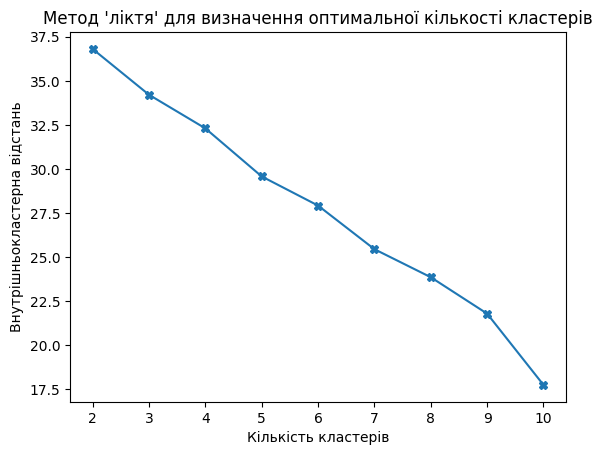

In [42]:
plt.plot(range(2, 11), distances, marker='X')
plt.title("Метод 'ліктя' для визначення оптимальної кількості кластерів")
plt.xlabel('Кількість кластерів')
plt.ylabel('Внутрішньокластерна відстань')
plt.show()

## Висновок
У цій практичній роботі ми реалізували ієрархічну кластеризацію на основі вибраного набору даних та провели кластерний аналіз, щоб визначити оптимальну кількість кластерів для поділу даних. Ось основні етапи та висновки роботи:

1. Підготовка даних: Було обрано необхідну підмножину даних з набору "prostate.csv" відповідно до варіанту та номеру групи. Ми виконали попередню обробку, яка включала нормалізацію даних та перетворення текстових значень у числові.
2. Вибір метрики та методу: Для кластеризації ми надали можливість вибору різних метрик відстані (наприклад, Евклідова, Чебишева, Міньковського) та методів (метод Уорда або метод найближчого сусіда). Було також реалізовано функцію, яка рекомендувала оптимальний метод залежно від щільності та структури даних.
3. Побудова дендрограми: На основі обраних параметрів кластеризації було створено дендрограму, яка дозволяє візуально оцінити процес злиття кластерів і визначити точки злиття при різній кількості кластерів.
4. Аналіз методом "ліктя": Для визначення оптимальної кількості кластерів ми застосували метод "ліктя". Побудовано графік, на якому показано зміну внутрішньокластерної відстані для 2-10 кластерів. На основі "перелому" в графіку було зроблено висновок, що оптимальна кількість кластерів для поділу даних становить від 3 до 5.
5. Матриця відстаней та класифікація: Ми обчислили та вивели матрицю відстаней для кількості кластерів від 1 до 30, а також матрицю класифікації для 30 кластерів, що відображає, до якого кластеру належить кожна точка.